importing Jupyter notebook from nn_lib.ipynb
0 ---activation: sigmoid
1 ---activation: relu
2 ---activation: sigmoid
---------- 0 ---------- 
Starting new environment
start_instance(): idx=0, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000000 -w log/output/episode-00000000/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000000/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_5385_obs]


nn_lib.ipynb:101: RuntimeWarning: overflow encountered in exp
  "\n",


PipeIo.writeline: Opened ACT pipe /tmp/extctrl_5385_act
EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000000/eplusout.err
Starting new environment
start_instance(): idx=0, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000000 -w log/output/episode-00000000/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000000/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_5385_obs]
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_5385_act
EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000000/eplusout.err
Starting new environm

/home/xiaonanchong/venv/rl/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


PipeIo.readline: Opening OBS pipe [/tmp/extctrl_5385_obs]
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_5385_act
EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000000/eplusout.err
Starting new environment
start_instance(): idx=0, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000000 -w log/output/episode-00000000/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000000/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_5385_obs]
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_5385_act
EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/

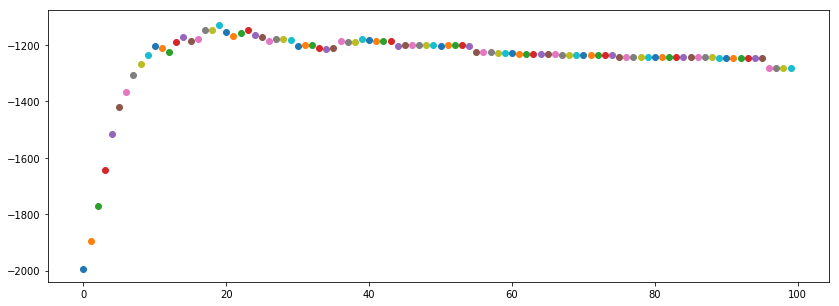

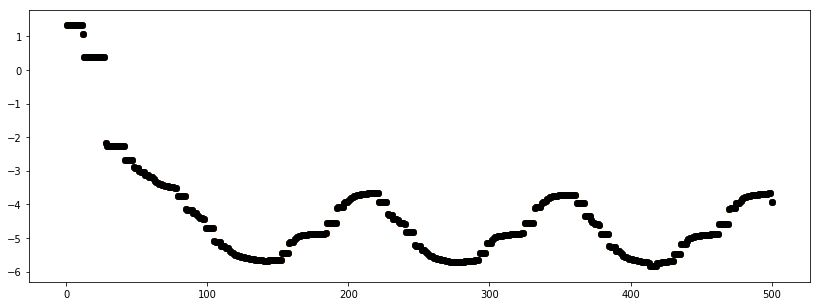

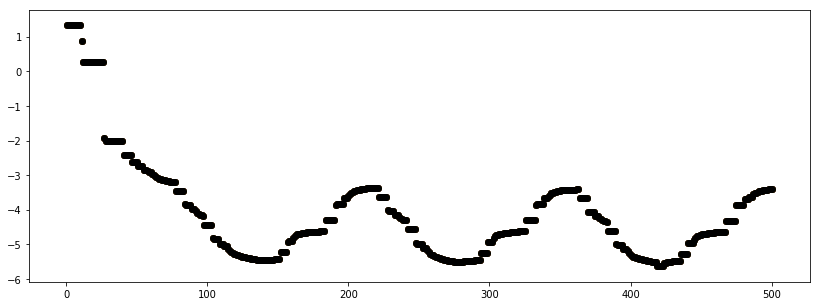

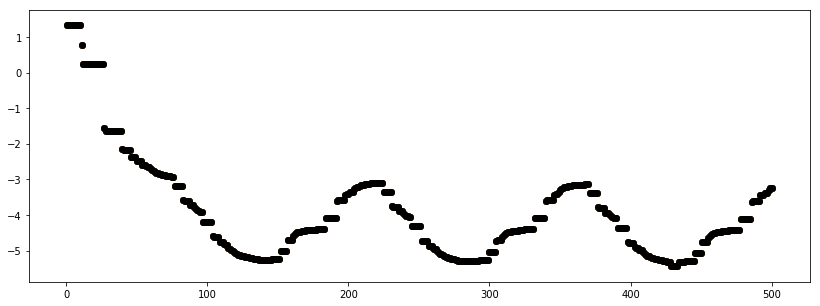

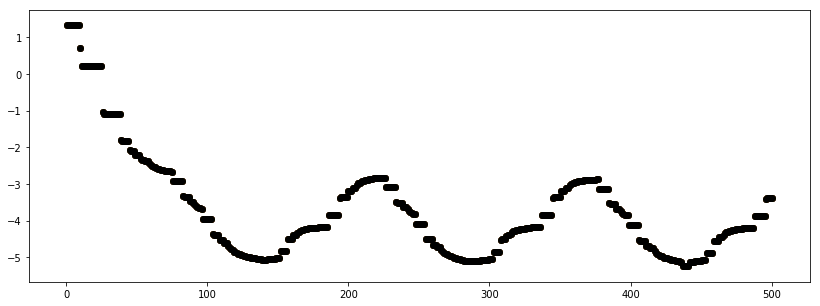

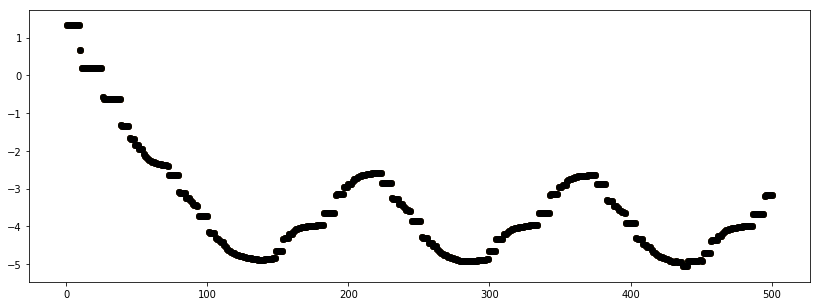

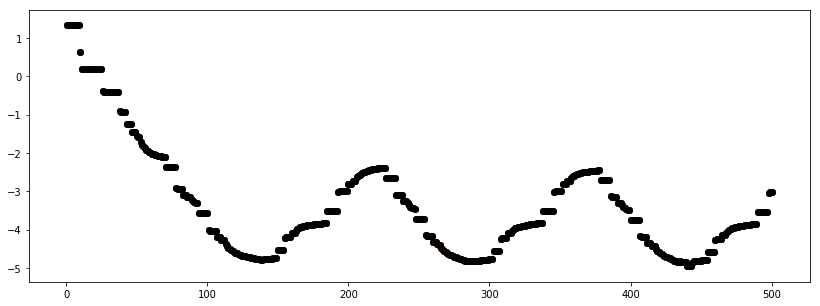

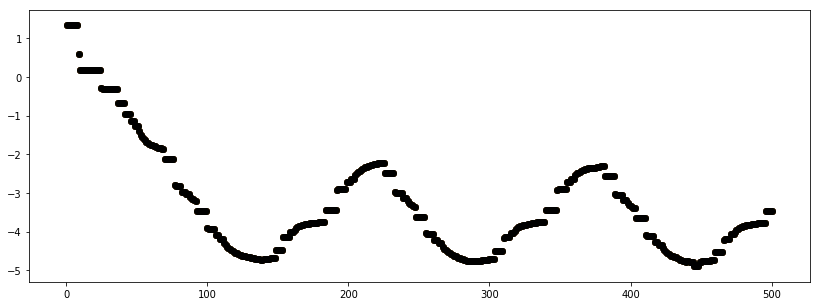

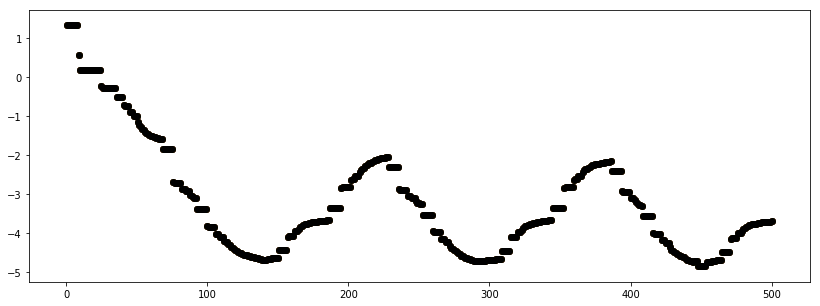

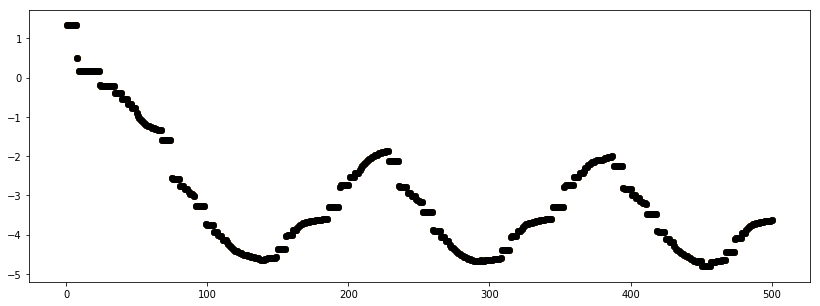

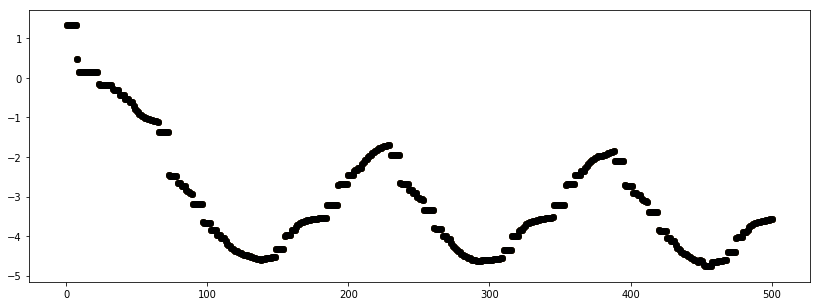

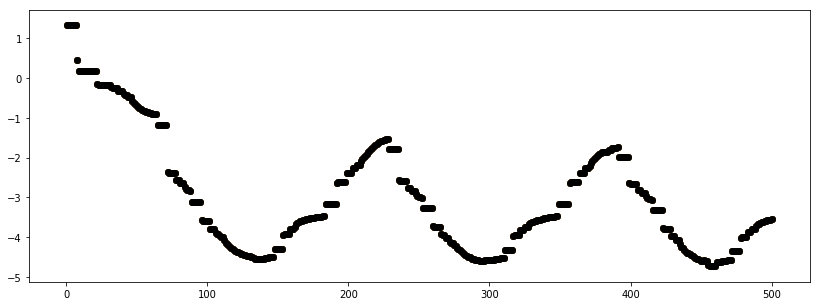

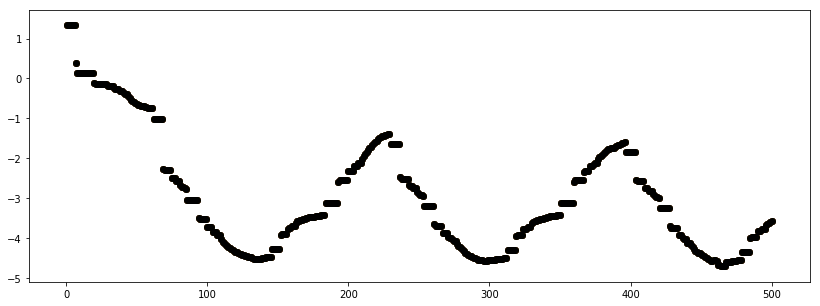

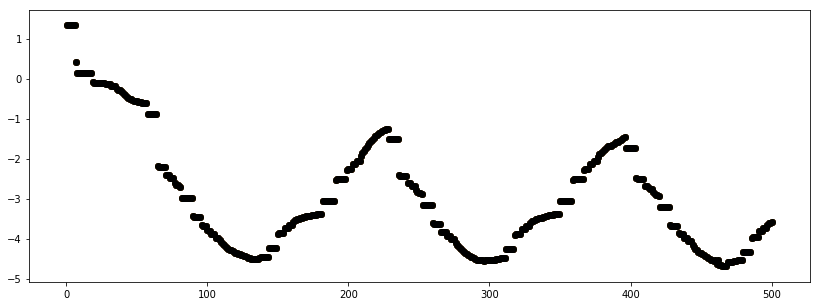

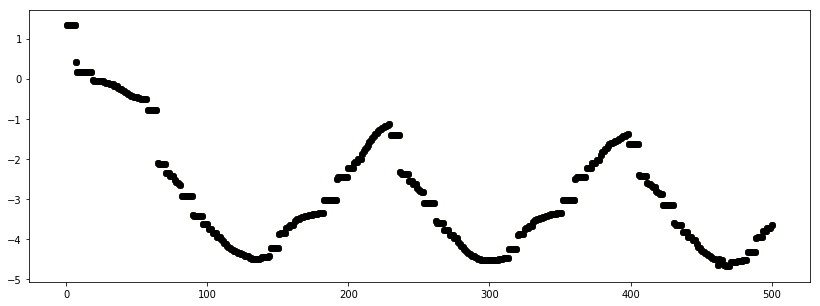

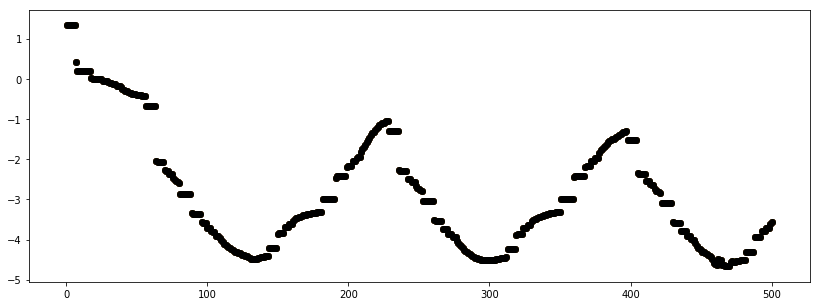

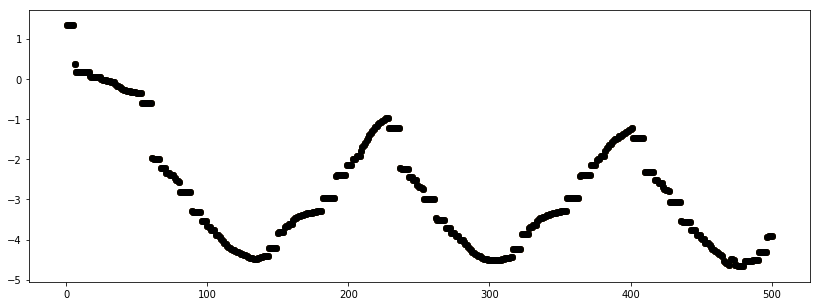

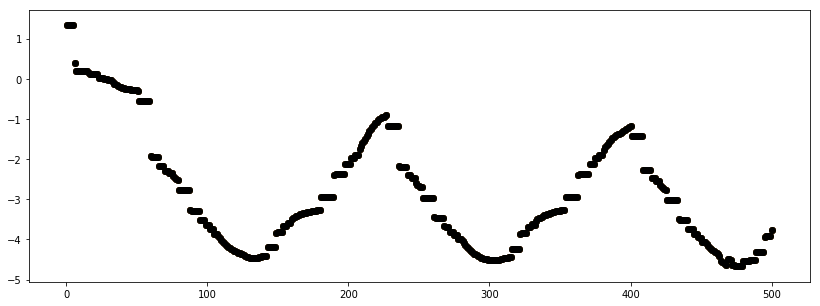

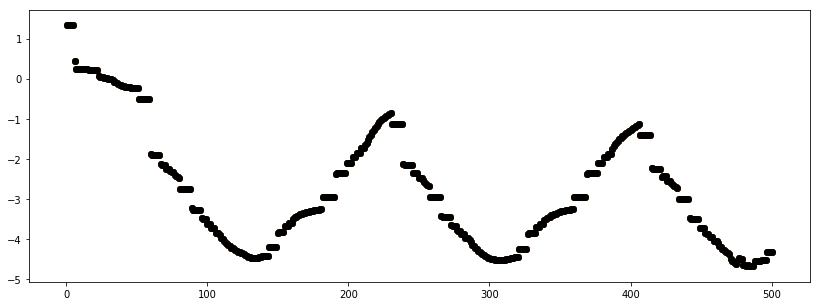

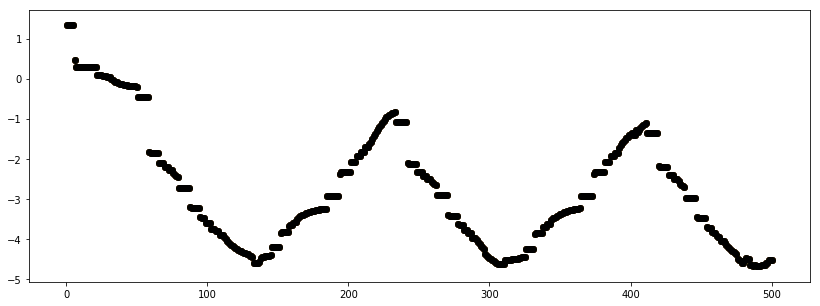

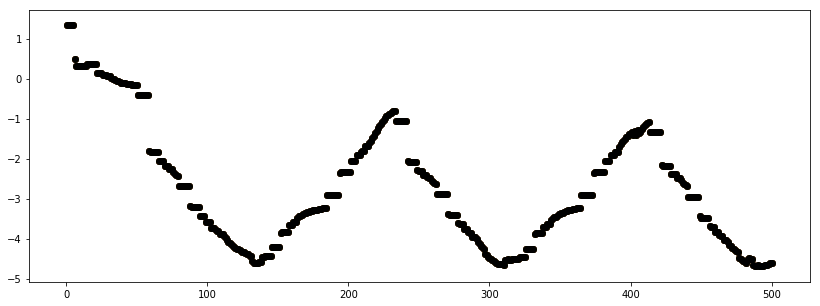

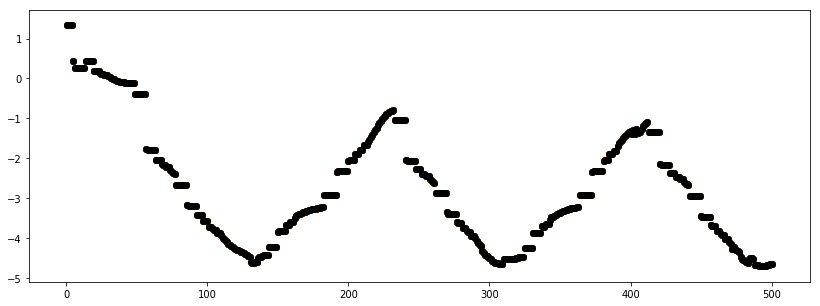

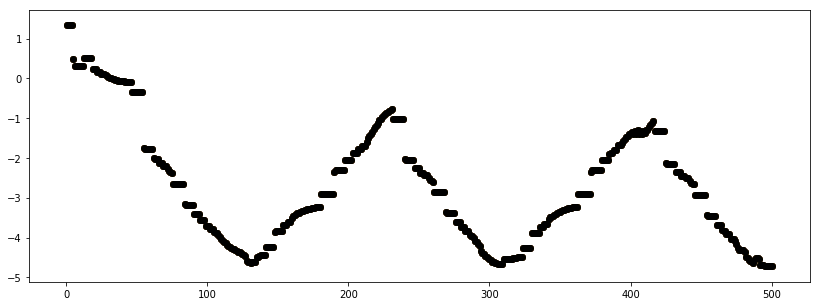

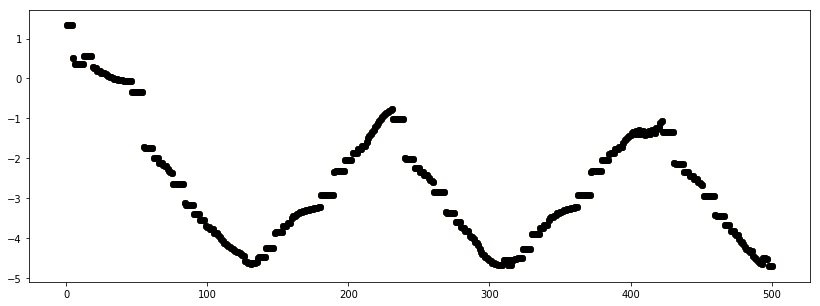

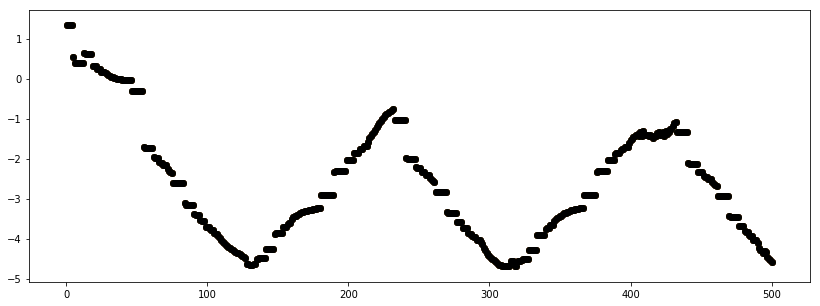

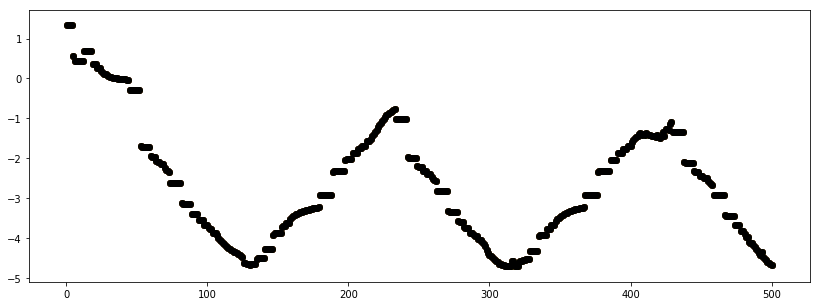

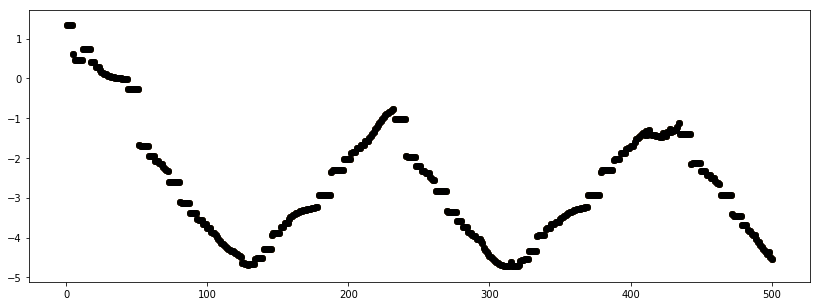

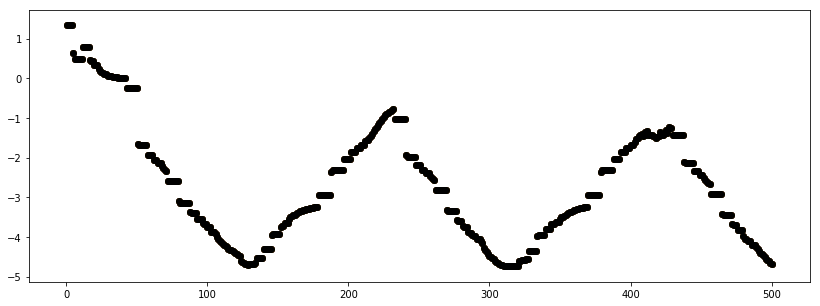

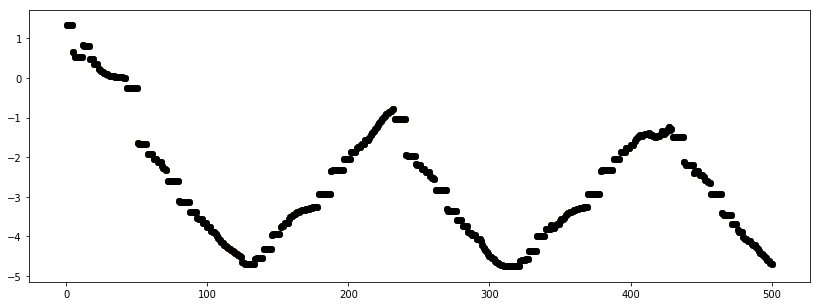

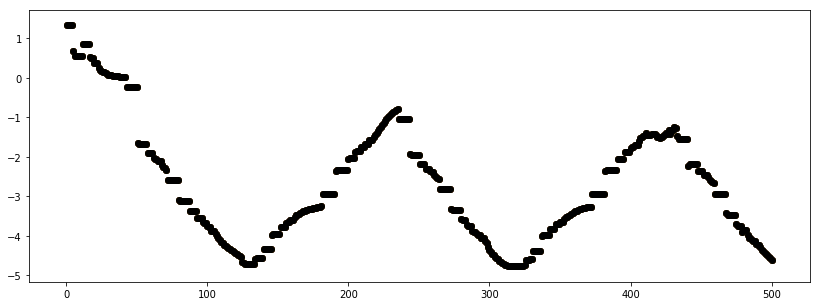

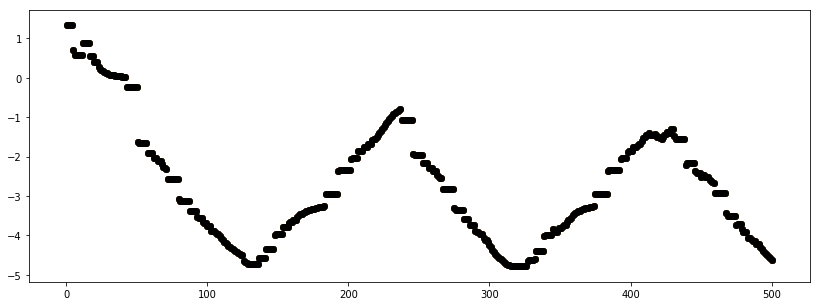

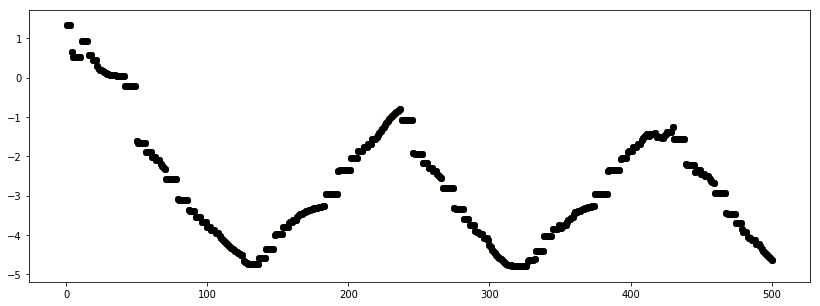

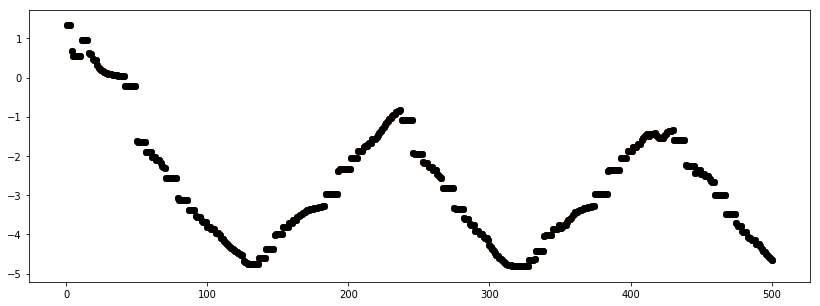

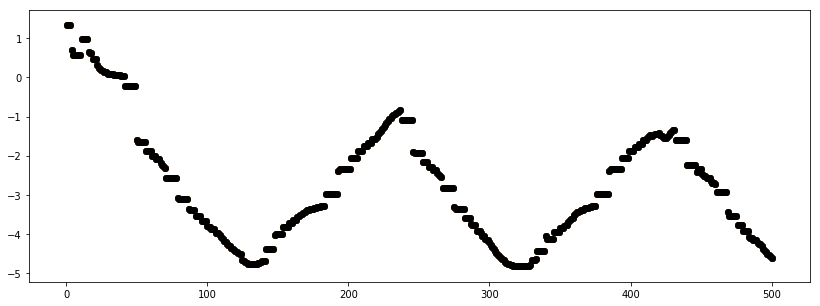

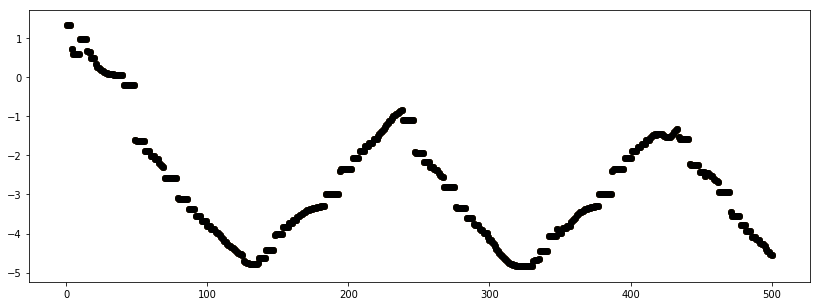

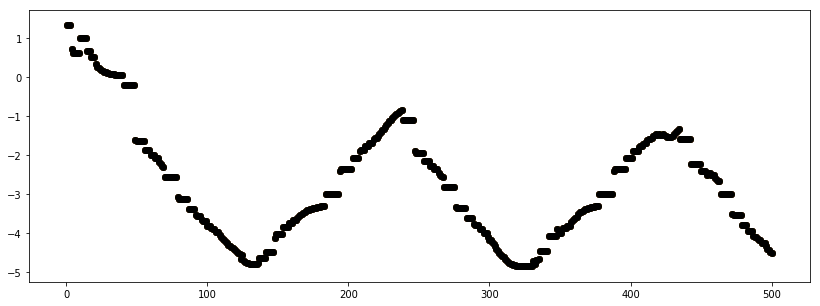

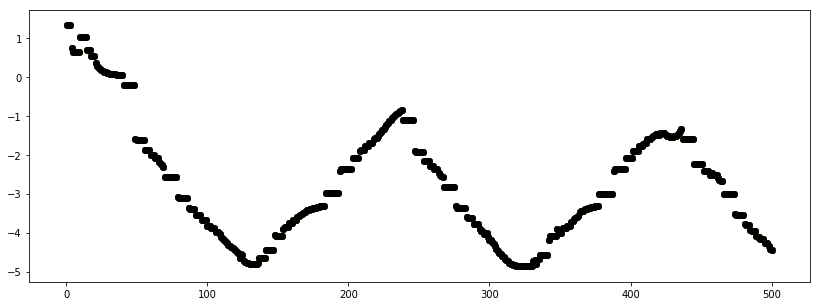

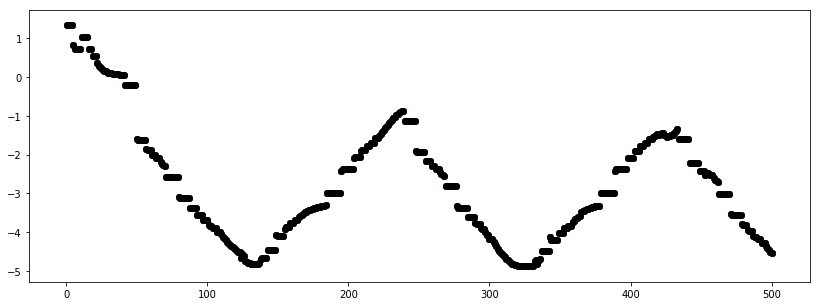

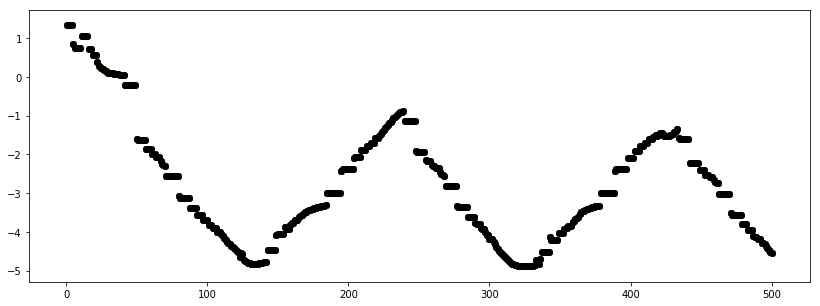

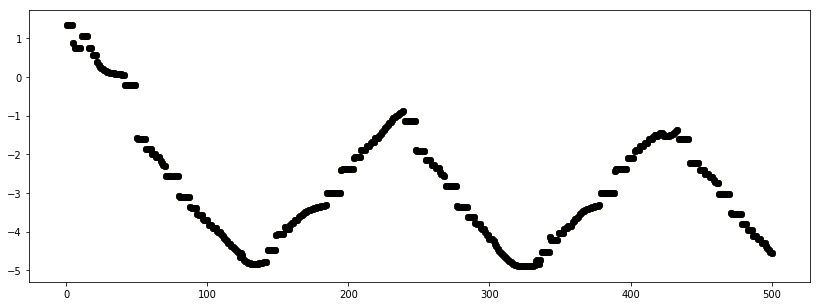

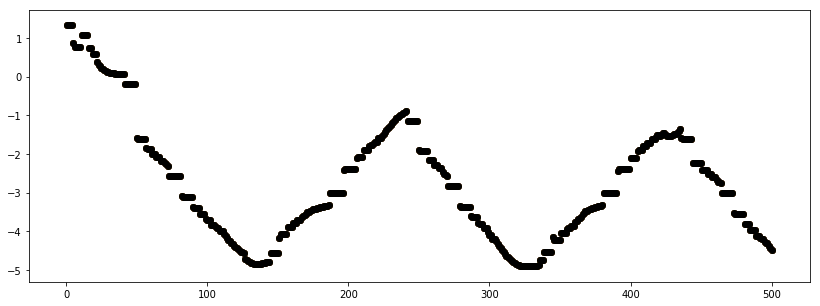

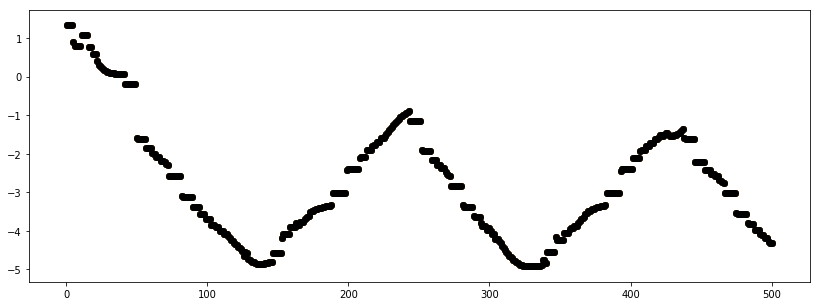

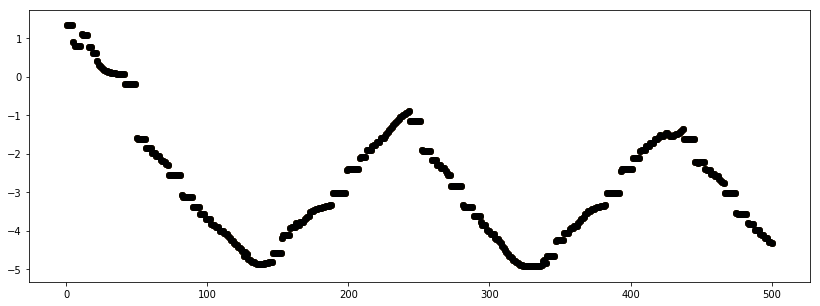

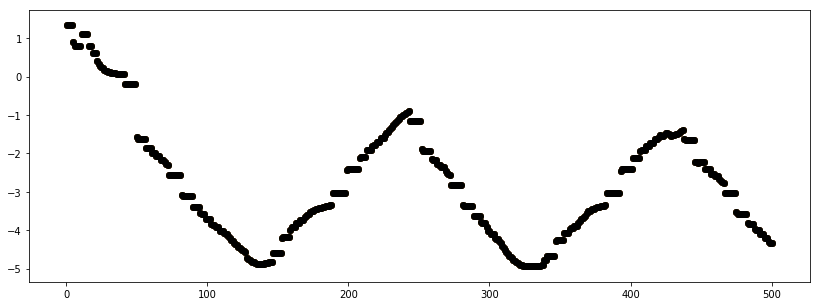

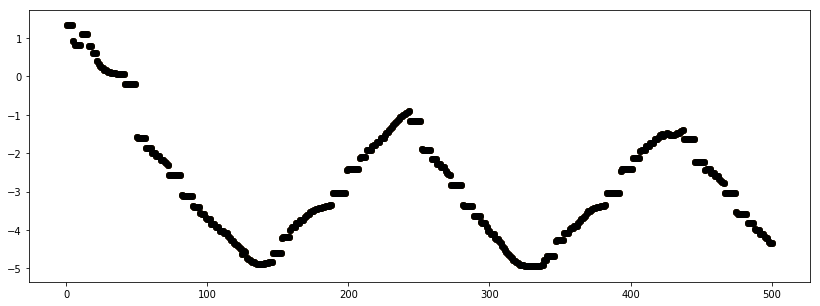

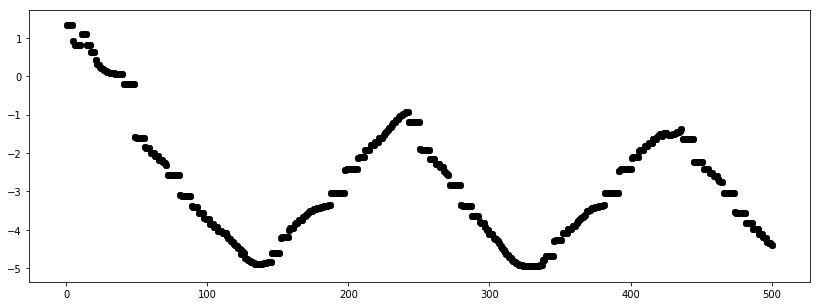

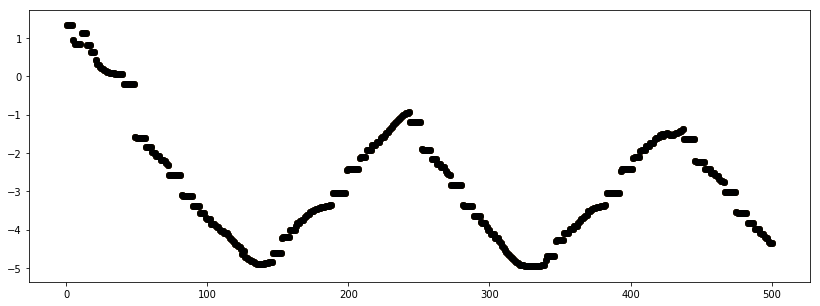

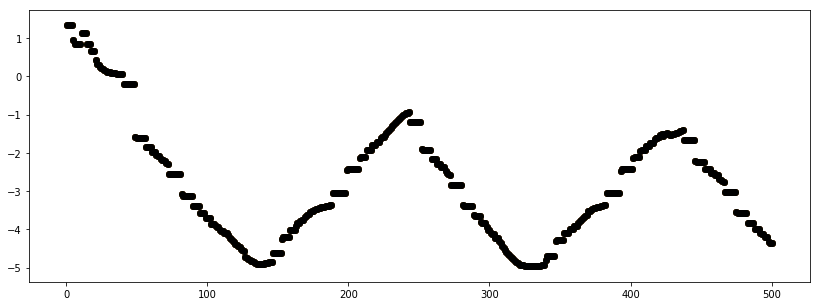

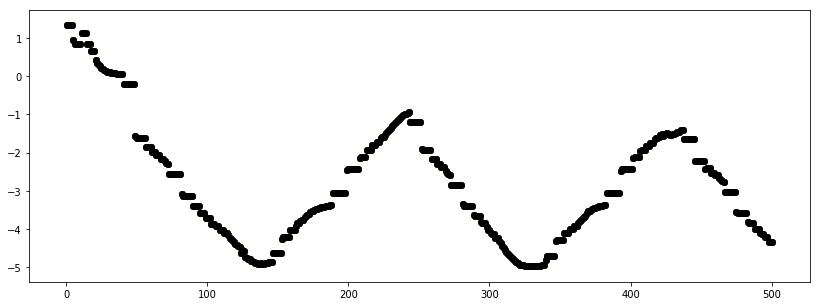

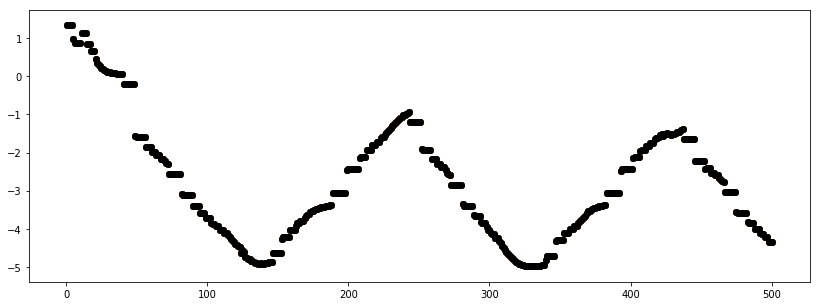

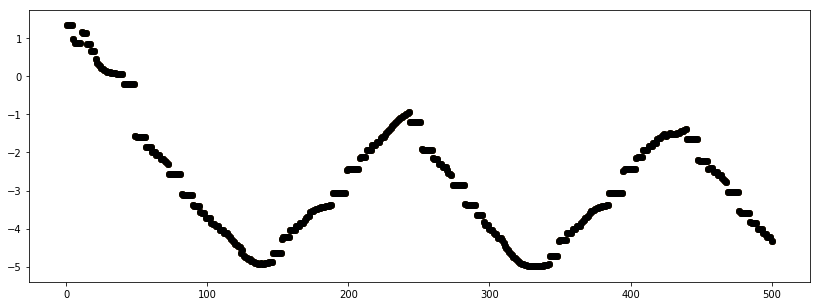

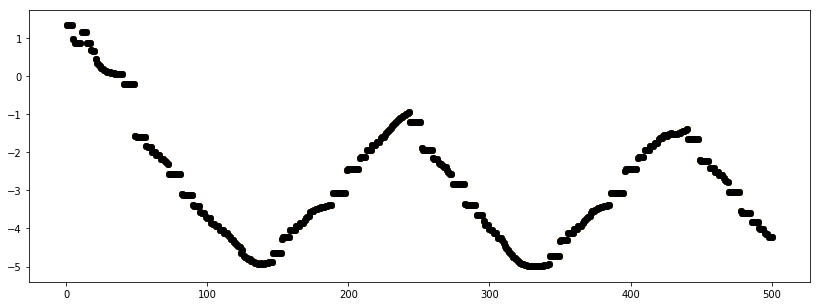

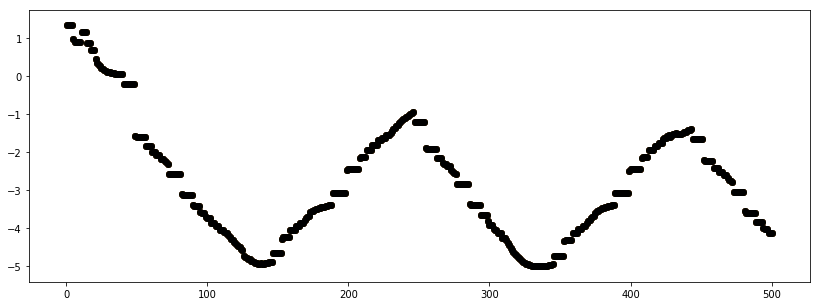

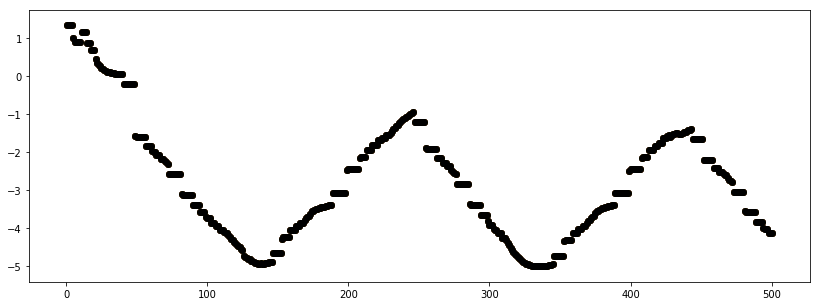

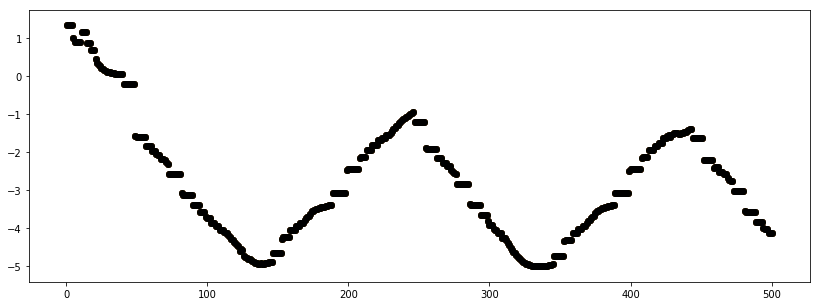

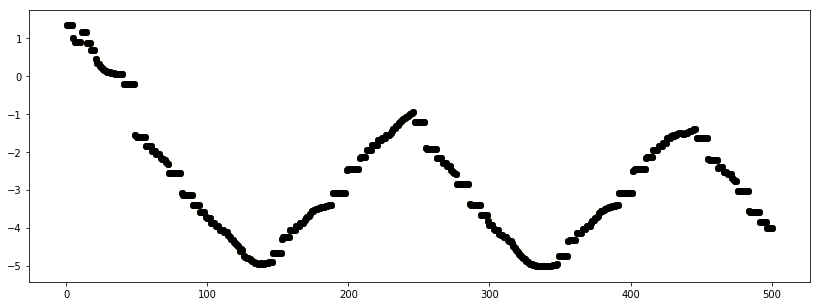

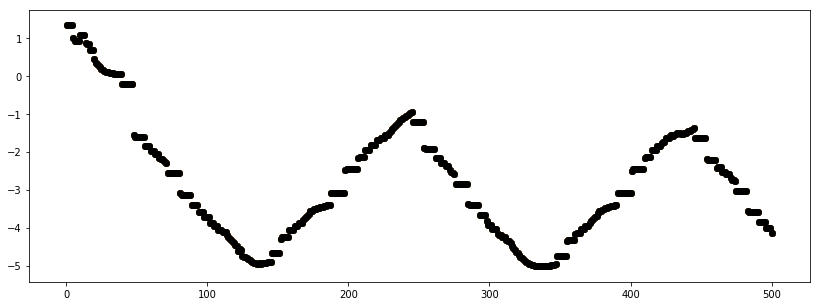

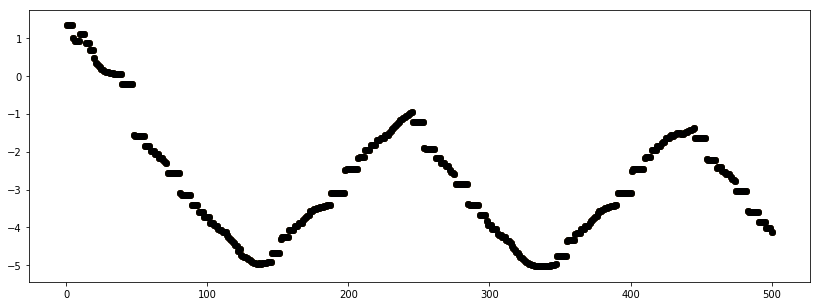

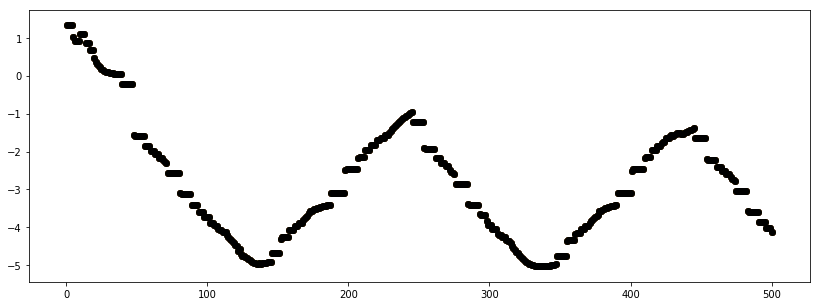

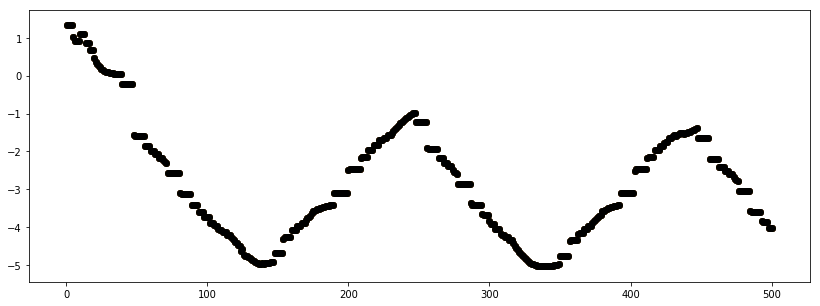

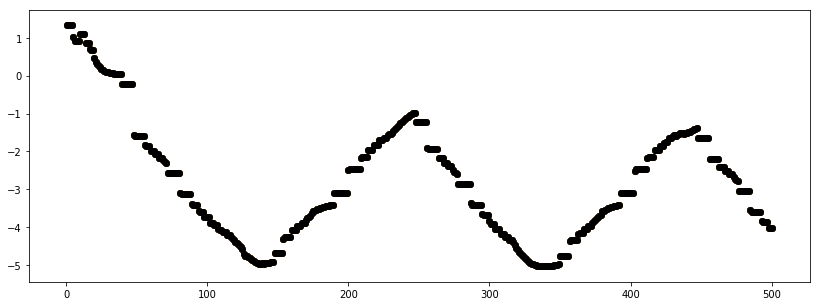

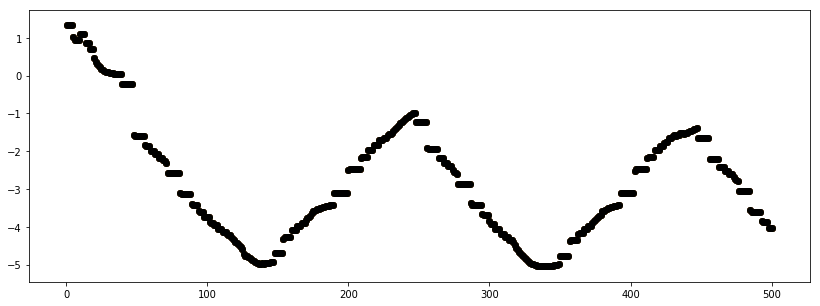

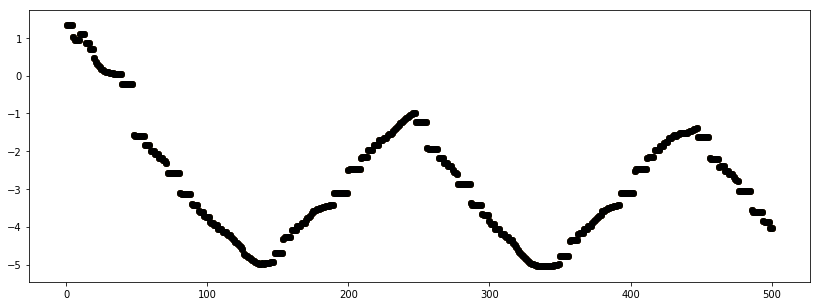

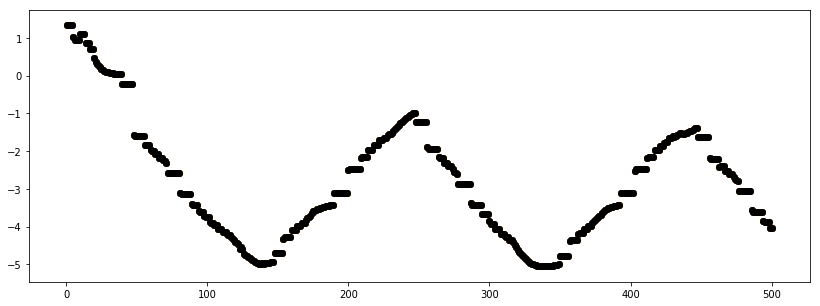

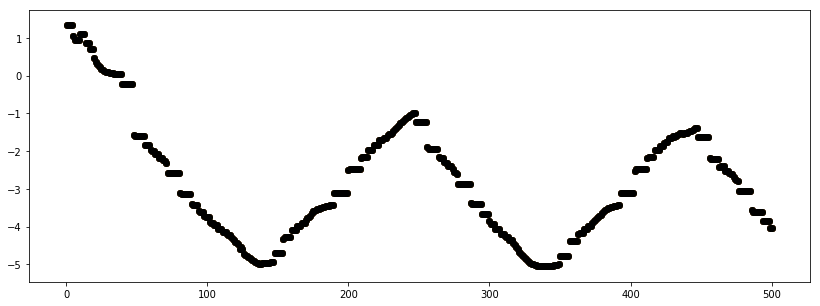

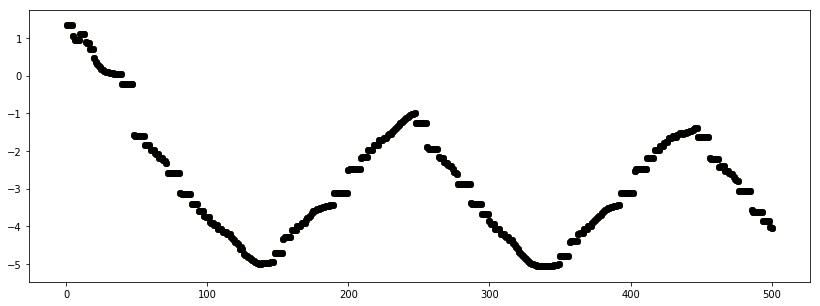

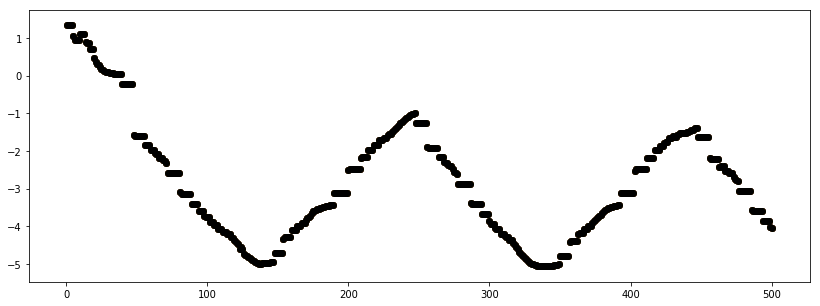

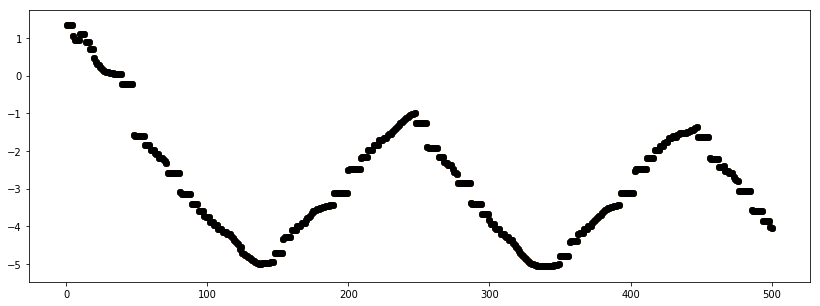

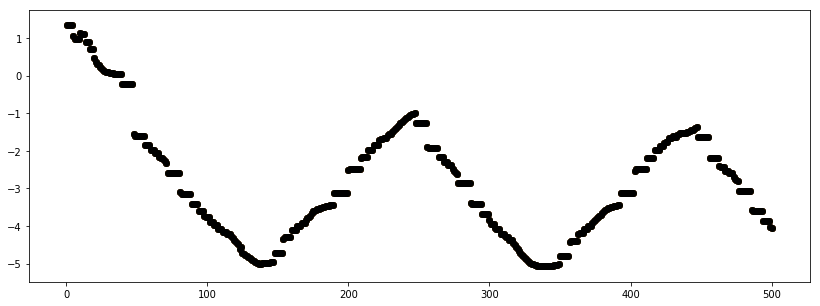

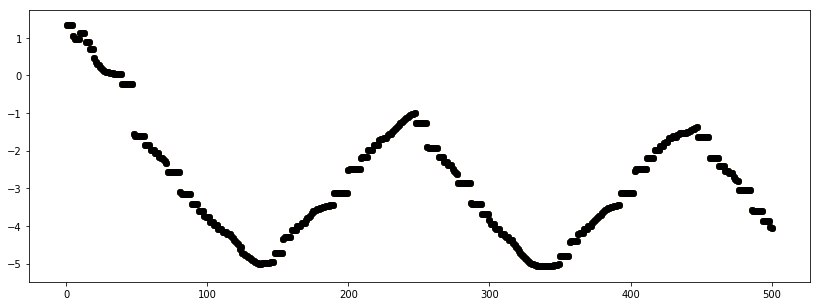

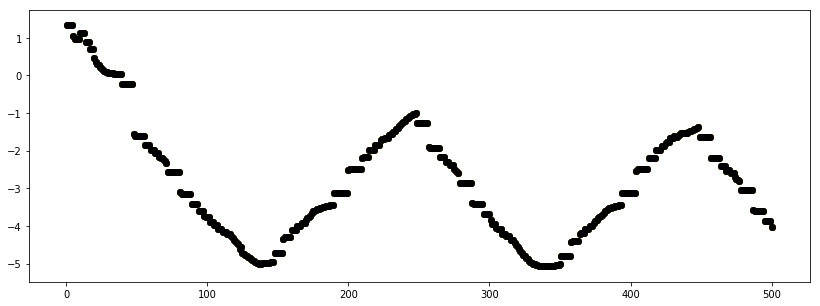

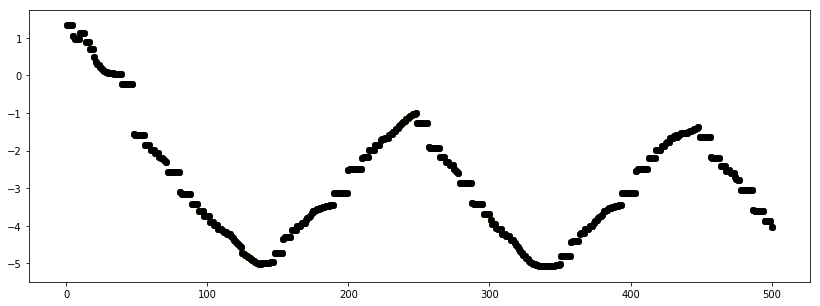

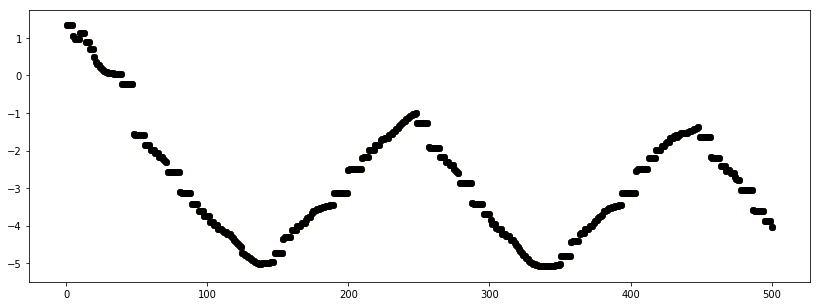

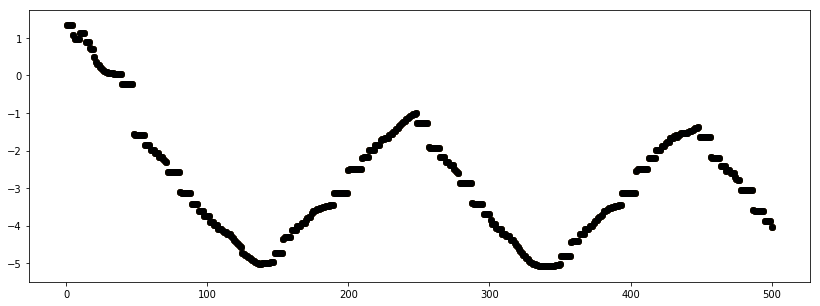

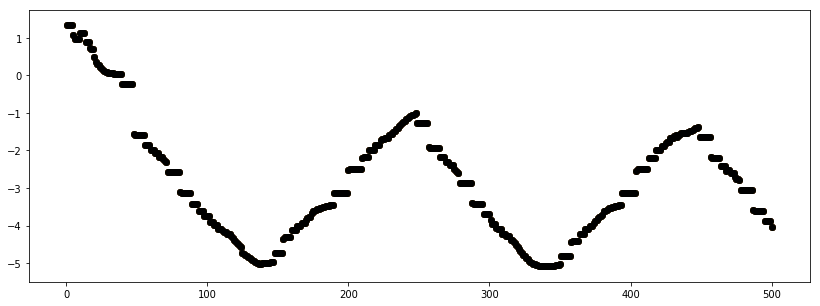

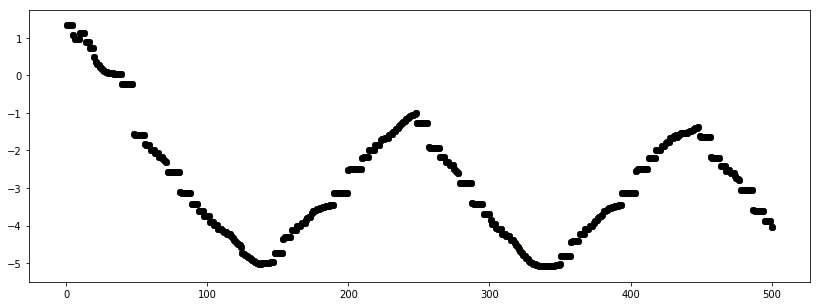

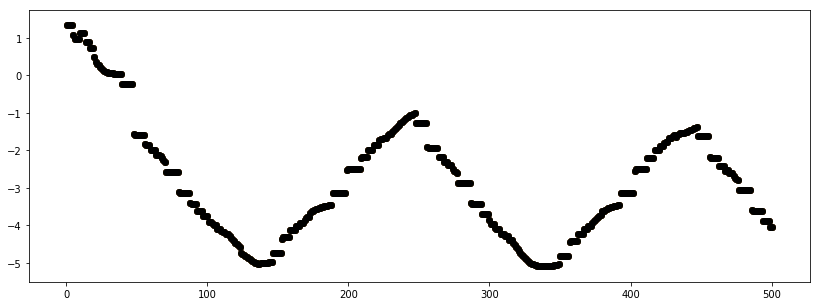

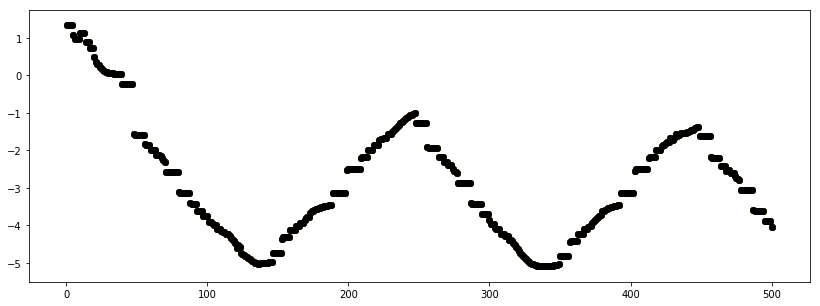

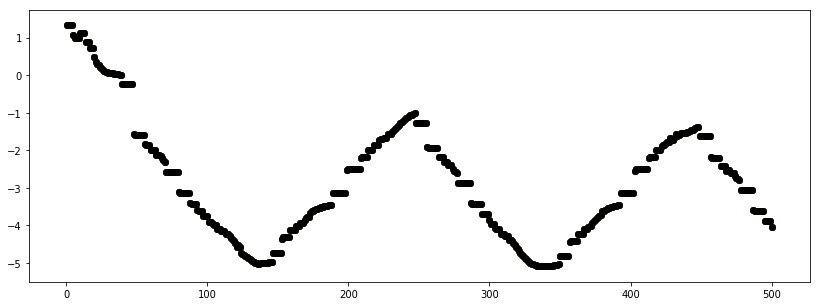

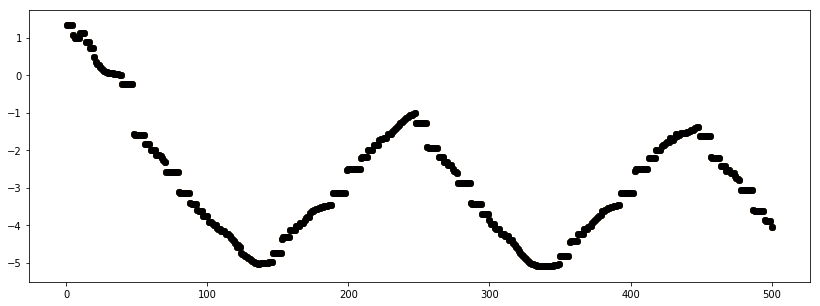

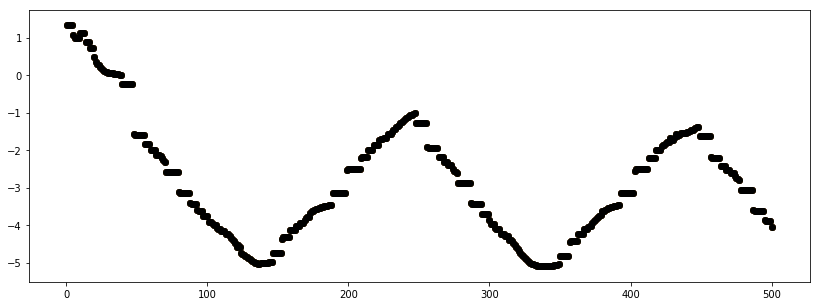

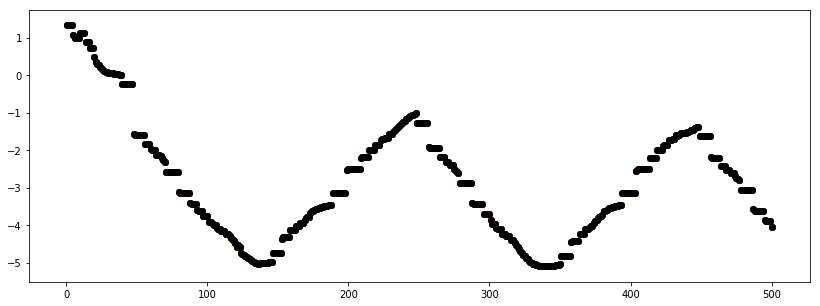

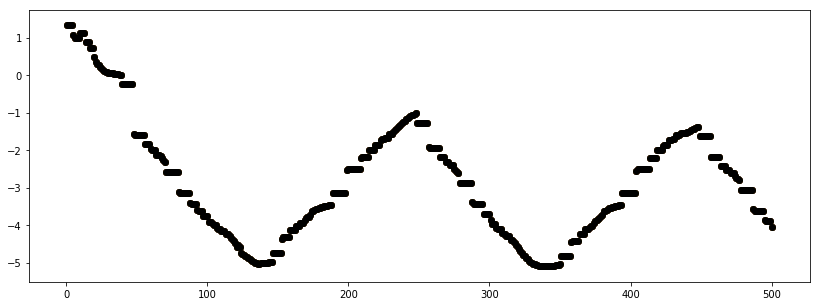

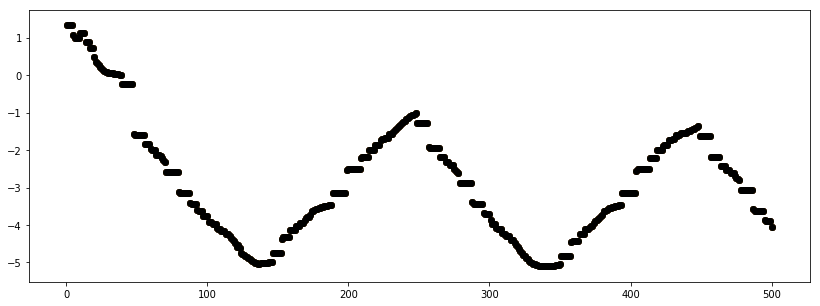

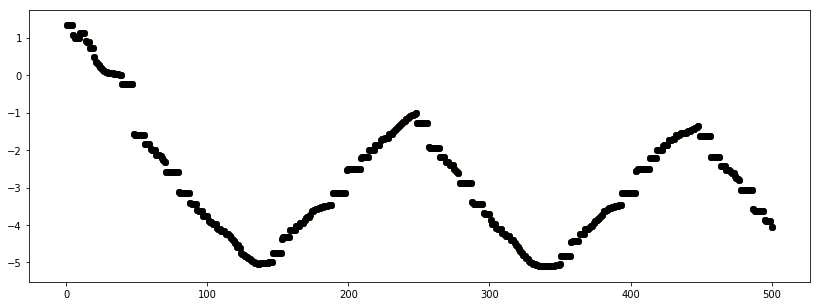

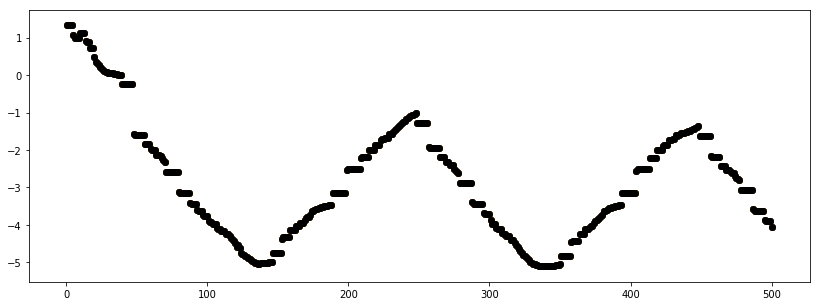

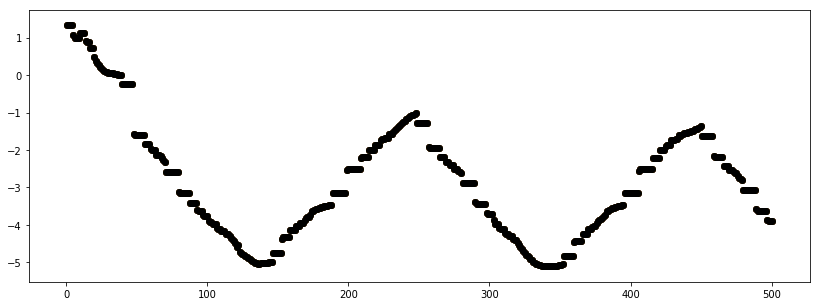

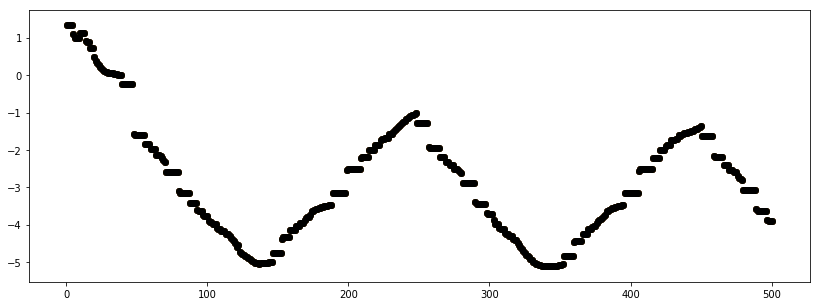

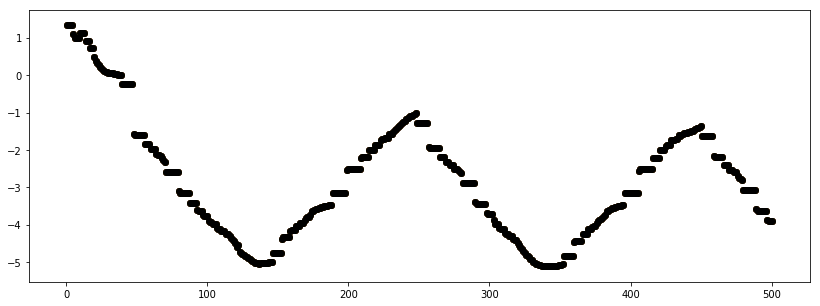

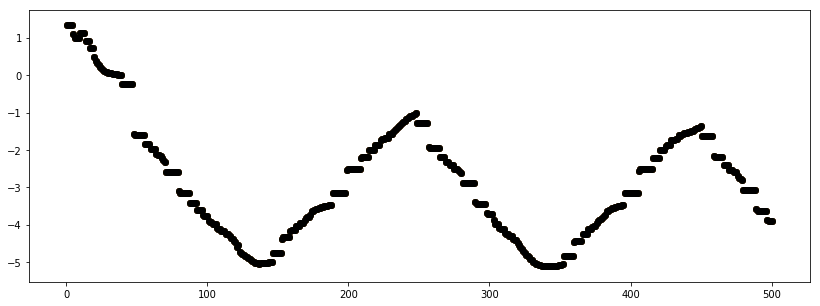

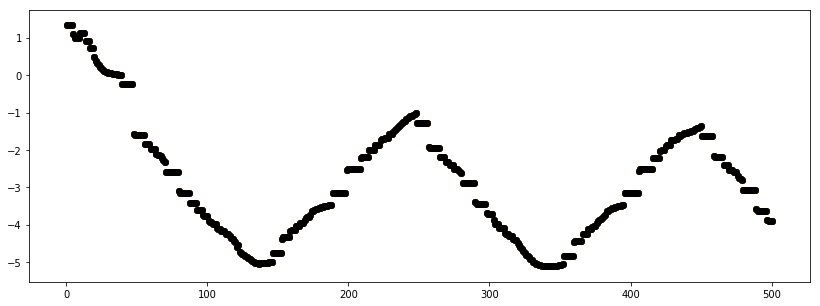

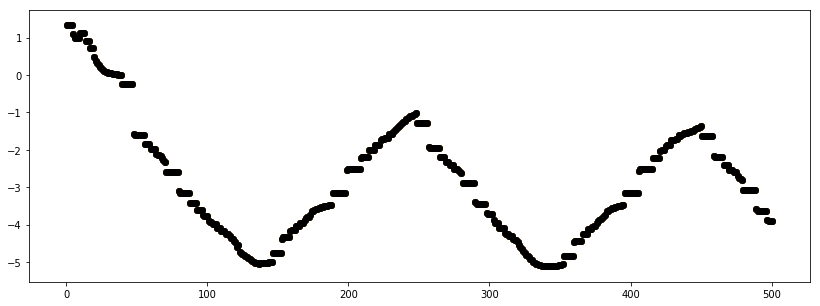

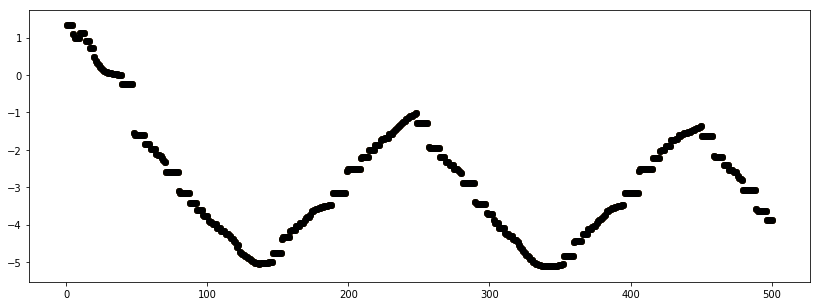

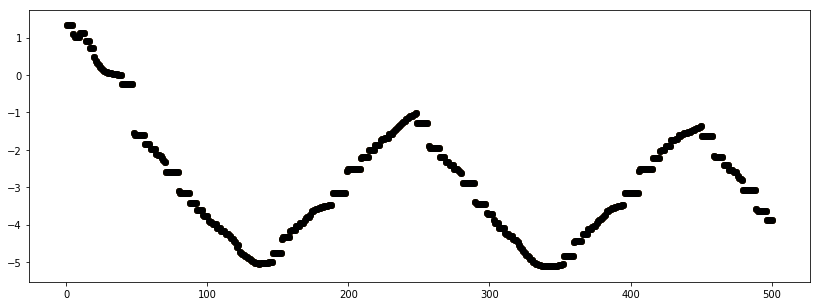

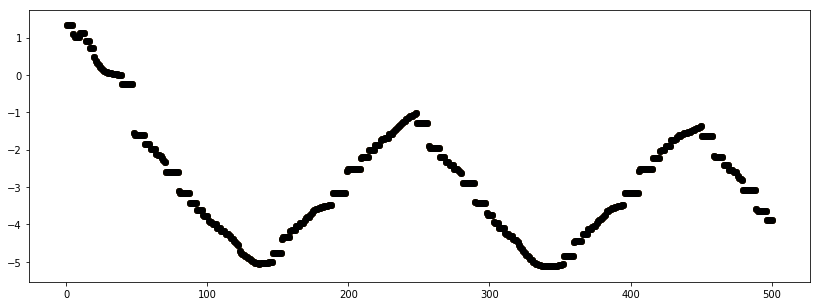

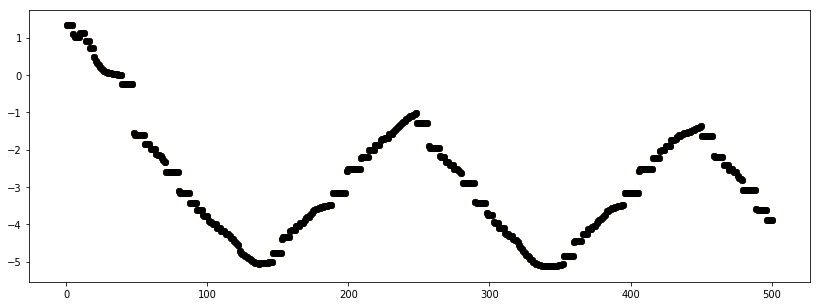

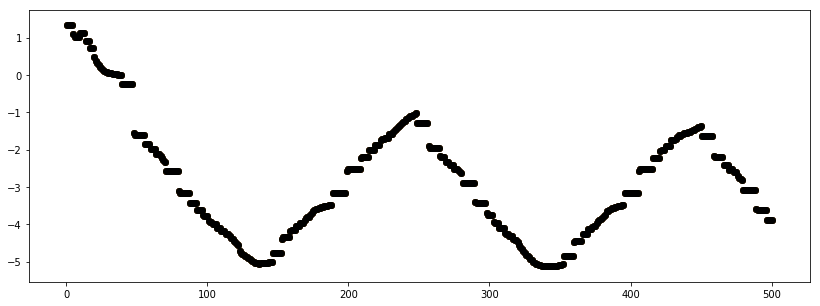

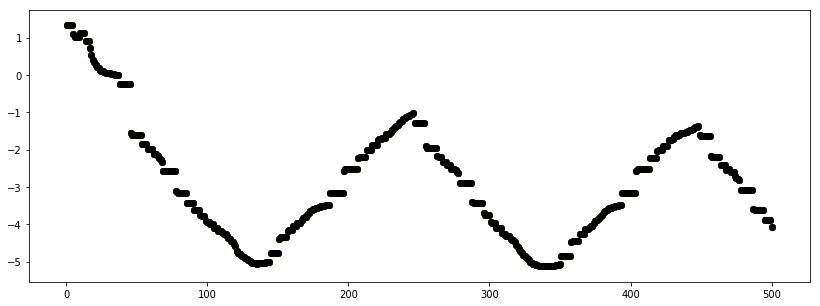

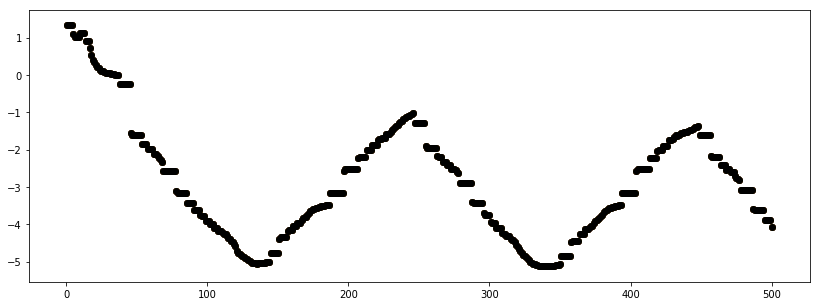

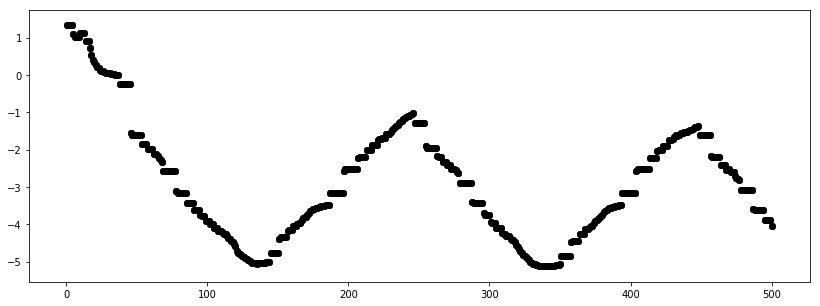

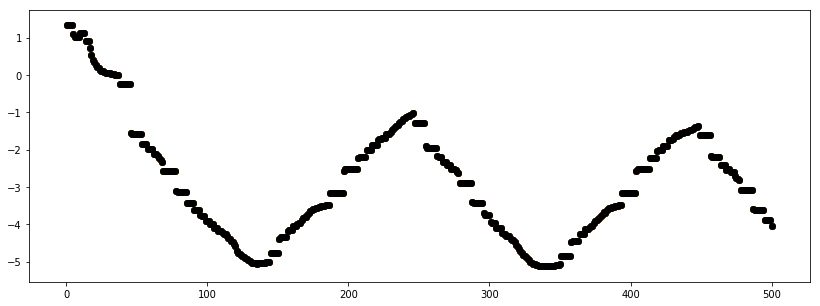

In [1]:
env_id = 'gym_energyplus:EnergyPlus-v0'

iteration = 100
batch_size = 7
episode = 500
learning_rate = 0.0002



import numpy as np
import gym
env = gym.make(env_id)

output_dim = len(env.action_space.low)
input_dim = len(env.observation_space.low)

!pip install import_ipynb
import import_ipynb
from nn_lib import MultiLayerNetwork, save_network, load_network

import nn_lib


neurons = [32, 16, output_dim]
activations = ["sigmoid", "relu", "sigmoid"]
net = nn_lib.MultiLayerNetwork(input_dim, neurons, activations)
#net = load_network("/home/xiaonanchong/rl-testbed-for-energyplus/jupyter/net1")

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [14, 5]
_, ax1 = plt.subplots()

for i in range(iteration):
    rewards = 0
    print('---------- '+str(i)+' ---------- ')
        
    if i%1==0:
        fig, ax = plt.subplots()
    
    for color in ['b', 'g', 'r', 'c', 'm', 'y', 'k']:
        
        t=0
        env = gym.make(env_id)
        observation = env.reset()
        done = False
        while not done and t<500:
            x = observation.reshape((1, input_dim))
            y = net(x)
            action = y[0]*2 -1
            #print(action)
            observation, reward, done, info = env.step(action)
            rewards+=reward*0.99**t
            t+=1
            
            if i%1==0:    
                ax.scatter(t,reward, c=color)    
                
    ax1.scatter(i,rewards)
    
    loss = -rewards/float(batch_size)
    print('rewards: ', rewards)
    net.backward(np.asarray([[loss for i in range(output_dim)]]))
    net.update_params(learning_rate)
    
save_network(net, "/home/xiaonanchong/rl-testbed-for-energyplus/jupyter/net_i100") 
print('network saved')

importing Jupyter notebook from func_plot_simulation.ipynb
Starting new environment
start_instance(): idx=0, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000000 -w log/output/episode-00000000/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000000/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_5385_obs]
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_5385_act
EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000000/eplusout.err


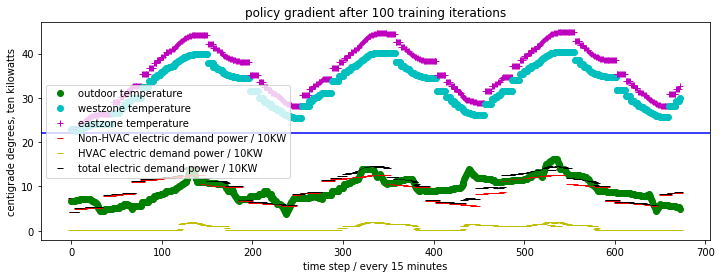

In [2]:
!pip install import_ipynb
import import_ipynb
from nn_lib import MultiLayerNetwork, save_network, load_network
from func_plot_simulation import plot_simulation
net = load_network("/home/xiaonanchong/rl-testbed-for-energyplus/jupyter/net_i100")
plot_simulation("policy gradient after 100 training iterations", 7, net)

EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000000/eplusout.err
Starting new environment
start_instance(): idx=1, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000001 -w log/output/episode-00000001/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000001/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_251_obs]
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_251_act


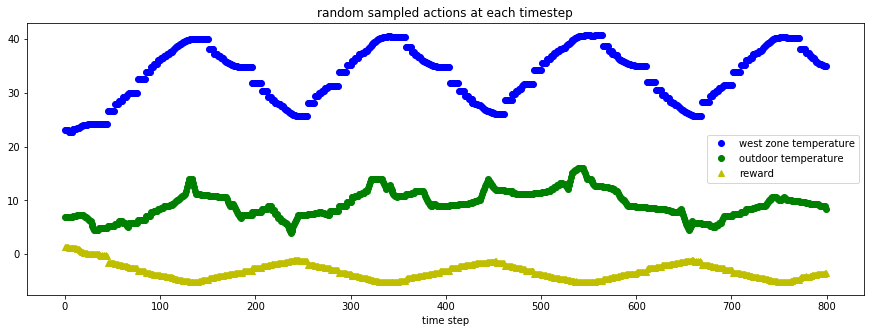

In [9]:
net = load_network("/home/xiaonanchong/rl-testbed-for-energyplus/jupyter/net1")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('random sampled actions at each timestep')
plt.xlabel('time step')

observation = env.reset()
for i in range(800):
    x = observation.reshape((1, input_dim))
    y = net(x)
    action = y[0]*2 -1

    observation, reward, done, info = env.step(action)
    if i == 0:        
        plt.plot(i, observation[1], 'bo', label='west zone temperature')
        plt.plot(i, observation[0], 'go', label='outdoor temperature')
        plt.plot(i, reward, 'y^', label='reward')
    else:
        plt.plot(i, reward, 'y^')
        plt.plot(i, observation[1], 'bo')
        plt.plot(i, observation[0], 'go')
plt.legend()

EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000003/eplusout.err
Starting new environment
start_instance(): idx=4, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000004 -w log/output/episode-00000004/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000004/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_251_obs]
[-0.99897813 -0.99744268 -0.99722057 -0.99948044]
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_251_act
[-0.99897777 -0.99744237 -0.99721979 -0.99948047]
[-0.99897777 -0.99744237 -0.99721979 -0.99948047]
[-0.99897777 -0.99744237 -0.99721979 -0.99948047]
[-0.998977

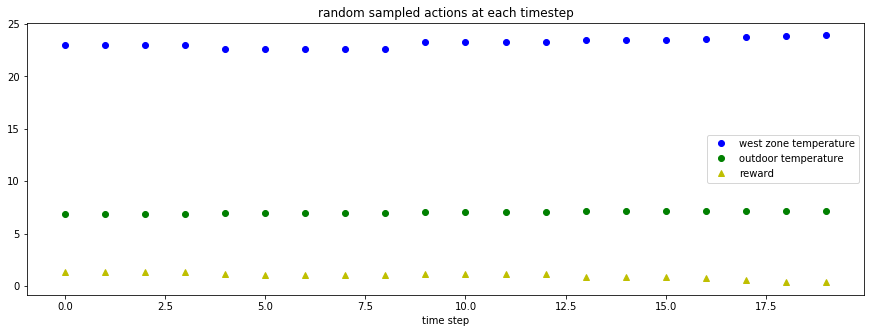

In [12]:
net = load_network("/home/xiaonanchong/rl-testbed-for-energyplus/jupyter/net1")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('random sampled actions at each timestep')
plt.xlabel('time step')

observation = env.reset()
for i in range(20):
    x = observation.reshape((1, input_dim))
    y = net(x)
    action = y[0]*2 -1
    print(action)

    observation, reward, done, info = env.step(action)
    if i == 0:        
        plt.plot(i, observation[1], 'bo', label='west zone temperature')
        plt.plot(i, observation[0], 'go', label='outdoor temperature')
        plt.plot(i, reward, 'y^', label='reward')
    else:
        plt.plot(i, reward, 'y^')
        plt.plot(i, observation[1], 'bo')
        plt.plot(i, observation[0], 'go')
plt.legend()